In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [4]:
ls data

men_shoes.csv  shoe_prices.csv


In [5]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean( )
mean_price

93.53952188183217

In [0]:
[3] * 5

[3, 3, 3, 3, 3]

In [0]:
y_true = df['prices_amountmin']
y_true.shape[0]

18280

In [0]:
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

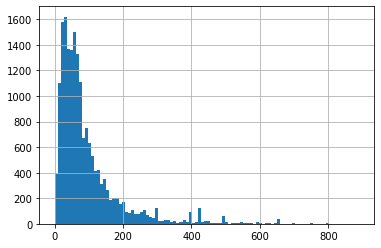

In [0]:
df['prices_amountmin'].hist(bins=100)

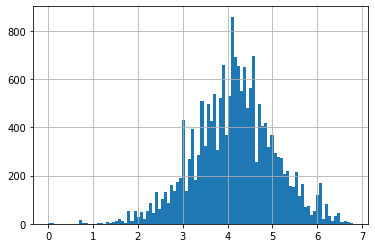

In [0]:
np.log( df['prices_amountmin'] + 1).hist(bins=100)
#mozna tez krócej
#np.log1p( df['prices_amountmin'] ).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [11]:
df['features'].value_counts()

[{"key":"Gender","value":["Unisex"]},{"key":"Polarized Lenses","value":["Non-polarized lenses"]}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           83
[{"key":"Shipping Weight (in pounds)","value":["3.0"]}]                                                                                                                                                                                                                                                                                                                                                                                  

In [0]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [12]:
df['features'].factorize()


(array([  0,   0,   1, ..., 728, 728, 728]),
 Index(['[{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["M"]},{"key":"Shoe Category","value":["Men's Shoes"]},{"key":"Color","value":["Multicolor"]},{"key":"Manufacturer Part Number","value":["8190-W-NAVY-7.5"]},{"key":"Brand","value":["Josmo"]}]',
        '[{"key":"Gender","value":["Men"]},{"key":"Color","value":["Black"]},{"key":"Shipping Weight (in pounds)","value":["0.45"]},{"key":"Condition","value":["New"]},{"key":"Brand","value":["SERVUS BY HONEYWELL"]},{"key":"manufacturer_part_number","value":["ZSR101BLMLG"]}]',
        '[{"key":"Heel Height","value":["Low (3/4 in. to 1 1/2 in.)"]},{"key":"Material","value":["Synthetic"]},{"key":"Gender","value":["Men"]},{"key":"Shoe Size","value":["10"]},{"key":"Fabric Material","value":["Synthetic"]},{"key":"Color","value":["Gray"]},{"key":"Casual & Dress Shoe Style","value":["Loafers & Slip Ons"]},{"key":"Manufacturer Part Number","value":["GLM02-077"]},{"key":"Brand","value":["NAT

In [13]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
df['ab_cat'] = df['features'].factorize()[0]


In [0]:
feats = ['brand_cat']
X = df[ feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:

def run_model(feats):
  X = df[ feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model( ['brand_cat'])


(-58.38655694633361, 4.223555478221712)

In [16]:
run_model( ['ab_cat'])

(-62.47034066385045, 3.7008528953804776)

In [21]:
run_model( ['ab_cat', 'brand_cat'] )

(-58.14610679711175, 4.650059633901861)

In [0]:
!git config --global user.email "a.okolowicz.seweryn@gmail.com"
!git config --global user.name "Ola O-S"

In [23]:
!git pull origin master 


From https://github.com/Ondraszek13/dw_matrix
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
!git add matriday4.ipynb

In [37]:
ls


ColabDriveGithub.ipynb  Hello_Github.ipynb  matrix_one/
data/                   LICENSE             README.md


In [35]:
!git commit -m "Men's Shoe Prices dataset from data.world, model: DecisionTreeRegressor"

[master 0294741] Men's Shoe Prices dataset from data.world, model: DecisionTreeRegressor
 1 file changed, 1 insertion(+), 1 deletion(-)


In [36]:
!git push -u origin master

fatal: could not read Password for 'https://fd07627239b239fff6bc38266244d5086567702d@github.com': No such device or address
